In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spotify = pd.read_csv('Spotify.csv')

In [5]:
spotify.head()

,reviewId,content,score
0,1a362811-05bf-4159-bdf1-3855b623243f,Ta kota hug pele ajke? Choc day te kota choc p...,3
1,6a122149-1735-4a9c-b6c4-2e5fb4e28097,How good the app used to be but now the new up...,1
2,4f89b33f-4ed0-43e7-9fd5-99a0fa0a043b,Had problems with it for the last 2 months and...,1
3,4db8eec3-3e24-4f72-9db8-ff0dd9f4fb0f,Worst app U can't replay a song,1
4,37b6d99b-d939-4d93-96ad-6dcdfe4c17f8,I've had spotify for almost 4 years I love it ...,5


In [7]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reviewId  10000 non-null  object
 1   content   10000 non-null  object
 2   score     10000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


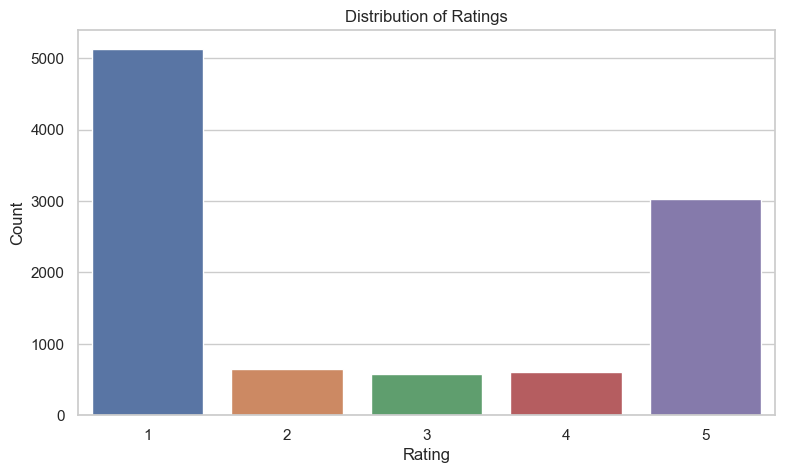

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(9, 5))
sns.countplot(data=spotify, x='score')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [11]:
spotify['Review Length'] = spotify['content'].apply(len)

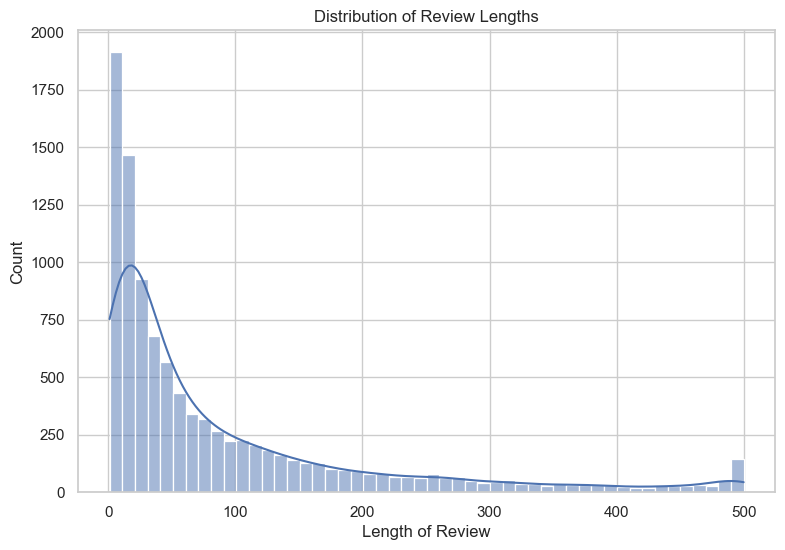

In [12]:
plt.figure(figsize=(9, 6))
sns.histplot(spotify['Review Length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.ylabel('Count')
plt.show()

In [13]:
pip install textblob

     -------------------------------------- 626.3/626.3 kB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 2.0 MB/s eta 0:00:00
  Using cached click-8.1.7-py3-none-any.whl (97 kB)
     -------------------------------------- 269.0/269.0 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
from textblob import TextBlob

In [14]:
def textblob_sentiment_analysis(content):
    sentiment = TextBlob(content).sentiment
    if sentiment.polarity > 0.1:
        return 'Positive'
    elif sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

In [16]:
spotify['Sentiment'] = spotify['content'].apply(textblob_sentiment_analysis)

In [18]:
spotify.head()

,reviewId,content,score,Review Length,Sentiment
0,1a362811-05bf-4159-bdf1-3855b623243f,Ta kota hug pele ajke? Choc day te kota choc p...,3,84,Neutral
1,6a122149-1735-4a9c-b6c4-2e5fb4e28097,How good the app used to be but now the new up...,1,161,Positive
2,4f89b33f-4ed0-43e7-9fd5-99a0fa0a043b,Had problems with it for the last 2 months and...,1,149,Positive
3,4db8eec3-3e24-4f72-9db8-ff0dd9f4fb0f,Worst app U can't replay a song,1,31,Negative
4,37b6d99b-d939-4d93-96ad-6dcdfe4c17f8,I've had spotify for almost 4 years I love it ...,5,83,Positive


In [19]:
sentiment_distribution = spotify['Sentiment'].value_counts()

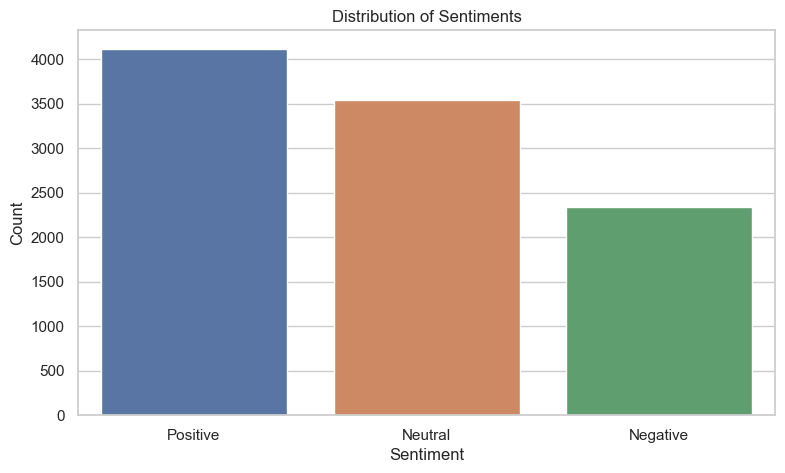

In [20]:
plt.figure(figsize=(9, 5))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

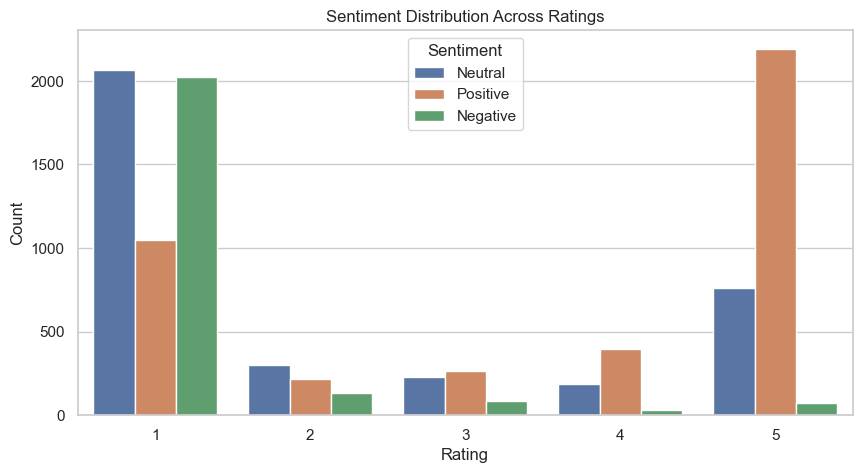

In [23]:
plt.figure(figsize=(10, 5))
sns.countplot(data=spotify, x='score', hue='Sentiment')
plt.title('Sentiment Distribution Across Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

In [25]:
pip install WordCloud

     -------------------------------------- 300.0/300.0 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
from wordcloud import WordCloud

In [33]:
def generate_word_cloud(sentiment):
    text = ' '.join(review for review in spotify[spotify['Sentiment'] == sentiment]['content'])
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.axis('off')
    plt.show()

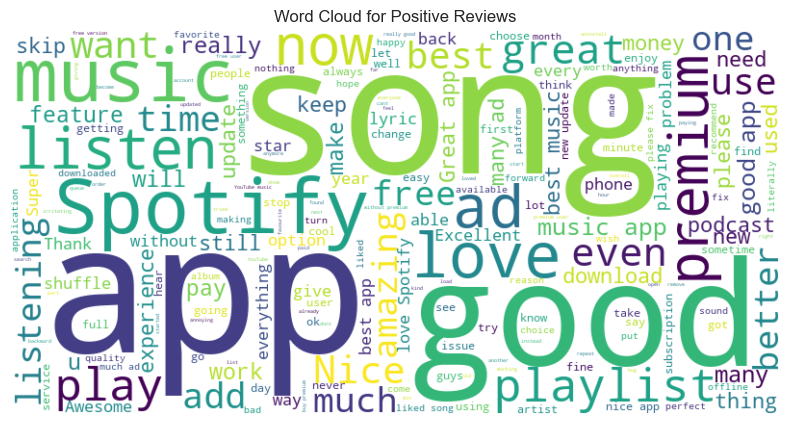

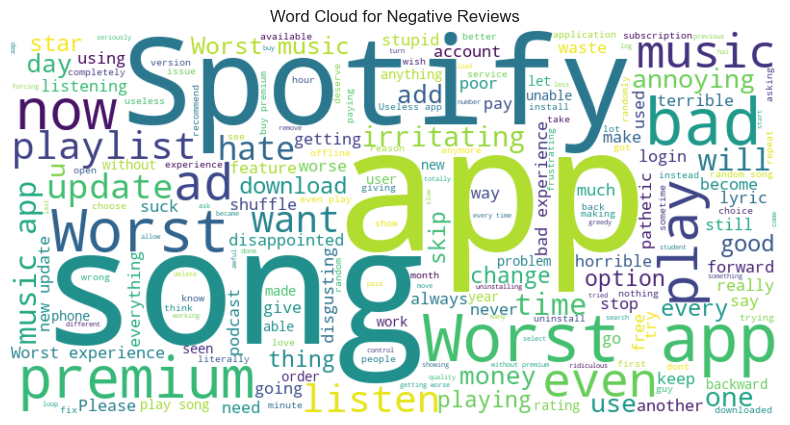

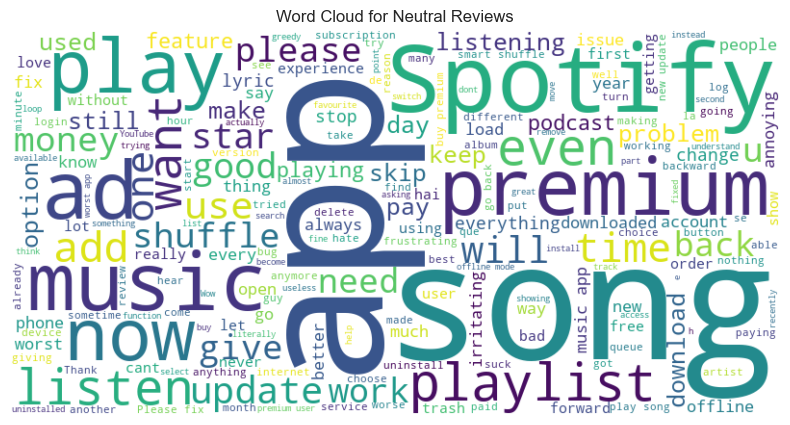

In [34]:
for sentiment in ['Positive', 'Negative', 'Neutral']:
    generate_word_cloud(sentiment)